### MADRIGAL

In [1]:
from datetime import datetime, timedelta
# Self Created Functions --------------------------
# Plot NIMO and Madrigal TEC together
from Madrigal_NIMO2 import NIMO_MAD_DailyFile, load_madrigal, mad_nimo_single_plot
from Load_NIMO2 import load_nimo
import pysat
import pysatMadrigal as pymad

Download Madrigal data that coincides with model data. 

#### Madrigal NIMO single Plot
Function: Madrgial_NIMO2.NIMO_MAD_DailyFile <br>
Plot up to 12 panels including Madrigal TEC with <br>
standard devation as error bars,filtered Madrigal TEC, <br>
and NIMO TEC along with the corresponding EIA Types <br>
<br>
Required Parameters <br>
<blockquote>
 mad_dc : dictionary of madrigal data from load_madrigal function <br>
 nimo_dc : dictionary of nimo data from load_nimo function <br>
    </blockquote>
Key Word arguments <blockquote>
 lon_start : starting longitude for plot. i.e. -90 <br> 
    <blockquote>
    Plot will range between -90 to -60 as a Default 
    </blockquote>
stime : datetime for plot <br>
mlat_val : int magnetic latitude cutoff <br>
max_nan : double of Maximum acceptable percent nan values in a pass
fosi : int font size
</blockquote>

#### load_madrigal
Function: Madrigal_NIMO2.load_madrigal <br>
Loads madrgial data into a dictionary <br>
<br>
Required Parameters 
<blockquote>
stime: datetime Universal time for the desired madrigal output <br>
fdir : str directory where file is located
</blockquote>
Returns <blockquote>
mad_dc : dictionary object <blockquote>
    dictionary of the madrigal data including: <br>
    tec, geographic latitude, geographic longitude, <br>
    dtec, timestamp, date (datetime format), <br>
    magnetic latitude, magnetic longitude
</blockquote> </blockquote>

Notes <br>
<blockquote>
 This takes in madrgial files of format gps%y%m%dg.002.netCDF4 <br>
 5 minute cadence 
 </blockquote>

#### load_nimo
Function : Load_NIMO2.load_nimo <br>
Loads Nimo file inot a dictionary <br>
<br>
Required Parameters: 
<blockquote>
stime : datetime of desired Nimo data
</blockquote>
Key Word Arguments <blockquote>
fdir : directory of NIMO file <br>
name_format : string <blockquote>
        format of NIMO filename including date format before .nc <br>
        Default: 'NIMO_AQ_%Y%j' </blockquote>

*_var : str of variable names for NIMO <blockquote>
        variable names to be opened in the NIMO file <br>
        * ne, lon, lat, alt, hr, min, tec, hmf2, nmf2 <br>
        Defaults <blockquote>
            electron density - 'dene' <br>
            geo longitude - 'lon'<br>
            geo latitude - 'lat' <br>
            altitude - 'alt'<br>
            hour - 'hour'<br>
            minute - 'minute'<br>
            TEC - 'tec'<br>
            hmf2 - 'hmf2'<br>
            nmf2 - 'nmf2' </blockquote> </blockquote>
 nimo_cadence: int <blockquote>
        time cadence of NIMO data in minutes <br>
        default is 15 minutes </blockquote> </blockquote>
Retunrs <blockquote>
 nimo_dc : dictionary <blockquote>
    dictionary with variables: dene,lon,lat,alt,hour,minute,date, tec,hmf2
</blockquote> </blockquote>



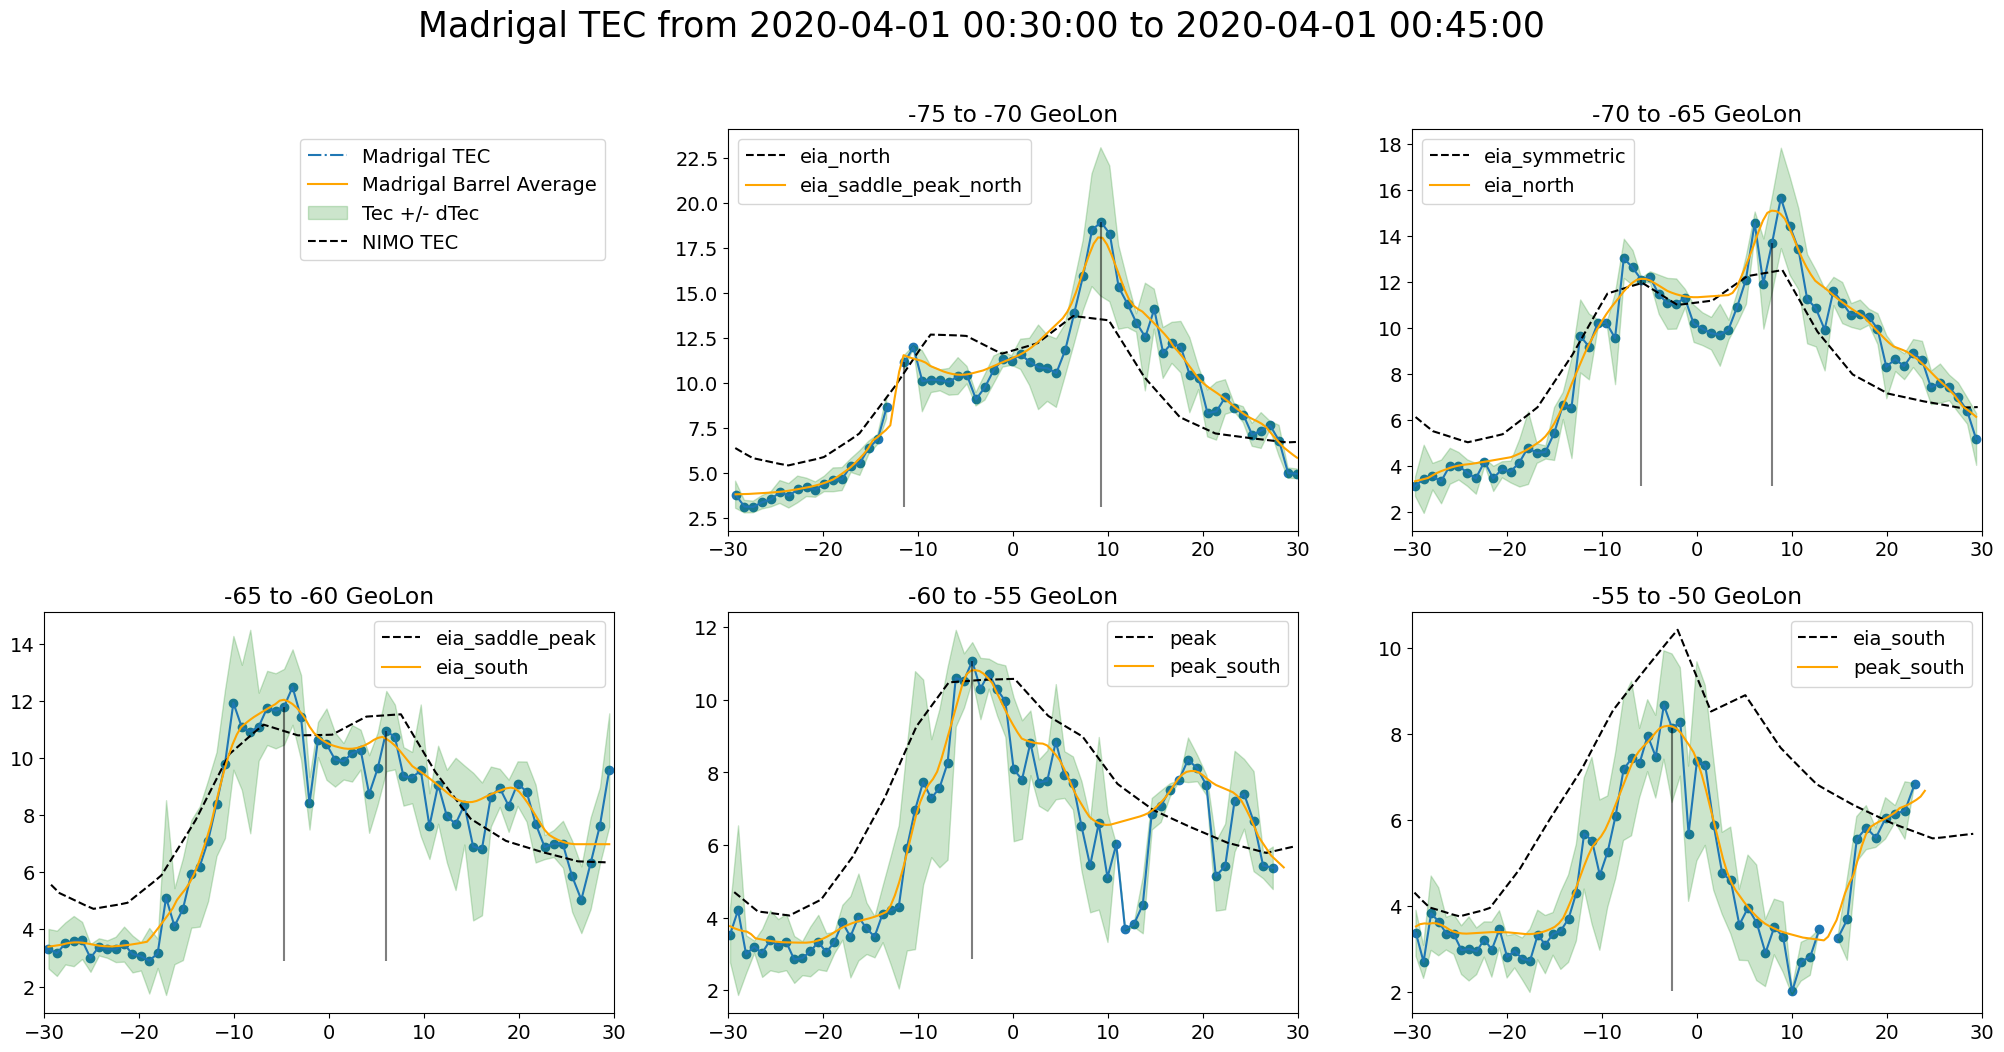

In [2]:
stime = datetime(2020, 4,1,0,30)
load_file = '~/data/gnss/tec/vtec/'
nim_dir = '~/NIMO/'
mad_dc = load_madrigal(stime, load_file)
nimo_dc = load_nimo(stime, fdir=nim_dir)
lon_start = -90
mlat_val = 30
mad_nimo_single_plot(mad_dc, nimo_dc, lon_start, stime,
                     mlat_val);

# TO make a map use 
#-------------------
# where nimo_map comes from: 
#nimo_df, nimo_map = nimo_mad_conjunction(nimo_dc, mlat_val,
#                                         glon_val, stime)
# madrigal_nimo_world_maps(stime, mad_dc, nimo_map)

#### Madrigal NIMO Daily Files and plots
Function: Madrgial_NIMO2.NIMO_MAD_DailyFile <br>
Daily Files include information about the conjunctions, peak locations, and EIA type <br>
Plot up to 12 panels including Madrigal TEC with <br>
standard devation as error bars,filtered Madrigal TEC, <br>
and NIMO TEC along with the corresponding EIA Types <br>
Includes a separate map plot for the TEC <br>
<br>
Required Parameters 
<blockquote>
 start_day : datetime for daily file <br>
 mad_file_dir : string file directory of Madrigal File <br>
 nimo_file_dir : string file directory of NIMO File <br>
</blockquote>
Key Word Arguments 
<blockquote>
 MLat : Magnetic Latitude cutoff <blockquote>
     $30^\circ$ Default </blockquote>
 lon_start : starting longitude for plot. i.e. -90 <br> 
    <blockquote>
    Plot will range between -90 to -30 as a Default <br>
    Another Recommended Region is 60 to 120
    </blockquote>
 file_save_dir: string of output directory for file<blockquote>
    if it is left empty ('' default), then cwd will be used </blockquote>
 fig_on : boolean specifying whether or not to make the file Default True <br>
 fig_save_dir: string of output directory for figures <blockquote>
    if it is left empty ('' default), then cwd will be used </blockquote>
 max_nan : double specifying the maximum %nan is acceptable in a pass <br>
 mad_filt : str Desired Filter for madrigal data (default barrel_average) <br>
 mad_interpolate : int <blockquote>
        int that determines the number of data points in interpolation <br>
        new length will be len(density)xinterpolate <br>
        default is 2 indicating double number of points </blockquote>
 mad_envelope : bool <blockquote>
        if True, barrel roll will include points inside an br
        envelope, if False (default), no envelope will be used </blockquote>
 mad_barrel : double latitudinal radius of barrel for madrigal (default: 3 degrees maglat) <br>
 mad_window : double latitudinal width of moving window (default: 3 degrees maglat) <br>
 nimo_filt : filter for nimo data <blockquote>
     Default '' (no filter) </blockquote>
 nimo_interpolate : linear interpolation parameter <blockquote>
        the number of data points will incrase by swarm_interpolate <br>
        Default is 2 (doubles number of points) <br> </blockquote>
 nimo_envelope : boolean <blockquote>
    determines if an envelope is used if barrel is in filter <br>
    Default is False (no envelope) </blockquote>
 nimo_barrel : double deteriming magnetic latitude radius of barrel <blockquote>
    Default is $3^\circ$ </blockquote>
 nimo_window : double determing magnetic latitude moving average window size <blockquote>
     Default is $3^\circ$ </blockquote>
 fosi : int for plot font size <blockquote>
     Default 18 <br>
     Exceptions: <blockquote>
         Super Title (fosi + 10) <br>
         legends (fosi - 3) </blockquote> </blockquote>
 nimo_name_format : string specifying nimo filename before '.nc' <blockquote>
    Default is 'NIMO_AQ_%Y%j' </blockquote>
 *_var : str of variable names for NIMO <blockquote>
        variable names to be opened in the NIMO file <br>
        * ne, lon, lat, alt, hr, min, tec, hmf2, nmf2 <br>
        Defaults <blockquote>
            electron density - 'dene' <br>
            geo longitude - 'lon'<br>
            geo latitude - 'lat' <br>
            altitude - 'alt'<br>
            hour - 'hour'<br>
            minute - 'minute'<br>
            TEC - 'tec'<br>
            hmf2 - 'hmf2'<br>
            nmf2 - 'nmf2' </blockquote> </blockquote>
 nimo_cadence: int <blockquote>
        time cadence of NIMO data in minutes <br>
        default is 15 minutes </blockquote>
 max_tdif : double <blockquote>
        maximum time distance (in minutes) between a NIMO and Swarm <br>
        conjunction allowed (default 15) </blockquote> </blockquote>


In [3]:
stime = datetime(2020, 4,1,0,0)
fig_save = '~/Plots/NIMO_MADRIGAL/'
file_save = '~/Type_Files/Daily/'
mad_load_file = '~/data/gnss/tec/vtec/'
nim_dir = '~/NIMO/'
mad_df = NIMO_MAD_DailyFile(stime, mad_load_file, nim_dir,
                            mlat_val=30, lon_start=-90,
                            file_save_dir=file_save,
                            fig_on=True, fig_save_dir=fig_save)

In [ ]:
stime1 = datetime(2020, 4,1,0,0) # Starting Date
for i in range(30):  # How many days you want to make files for
    stime = stime1 + timedelta(days=i)
    print(stime)
    mad_df = NIMO_MAD_DailyFile(stime, mad_load_file, nim_dir,
                            mlat_val=30, lon_start=60,
                            file_save_dir=file_save,
                            fig_on=True, fig_save_dir=fig_save)

2020-04-01 00:00:00
